# Business Understanding

The company would like to create a new movie studio for original video content, but we don't have any experience with making movies.  Here, we want to explore what types of films are performing best at the box office currently in order to make recommendations about what type of films to create in our new studio.

# Data Understanding

We are working with two datasets provided by IMDB and The Numbers.  The data includes information about movies and their genres, ratings, directors and writers, domestic and internatinal gross revenue, and budget.

## Data Preparation

In [22]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('data/im.db')

In [23]:
IMDB = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
IMDB

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [40]:
pd.read_sql("SELECT * FROM movie_basics;", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [48]:
query = "SELECT primary_title, genres FROM movie_basics"

In [49]:
imdb_df = pd.read_sql_query(query, conn)

In [50]:
conn.close()

In [51]:
TN = pd.read_csv('data/tn.movie_budgets.csv.gz')

In [52]:
TN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [53]:
TN.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Changing monetary column values from string to integer in order to perform mathematical operations...

In [54]:
columns_without_symbols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in columns_without_symbols:
    TN[col] = TN[col].str.replace('$', '', regex=False)
    TN[col] = TN[col].str.replace(',', '', regex=False)

In [35]:
TN.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


Here I'm going to calculate profit and ROI from the values provided above, so that I can use ROI as a measure of movie success moving forward.

In [55]:
converted_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in converted_columns:
    TN[col] = pd.to_numeric(TN[col], errors='coerce')

In [56]:
TN['profit'] = (TN['domestic_gross'] + TN['worldwide_gross']) - TN['production_budget']
TN.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129


Note that we report ROI as a percentage, so we multiply by 100.

In [57]:
TN['ROI'] = (TN['profit'] / TN['production_budget']) * 100
TN.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904,732.200683
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300,-44.992943
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831,463.224389
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129,511.010451


In [67]:
df = pd.merge(TN,
             imdb_df[['primary_title', 'genres']],
left_on='movie',
right_on='primary_title',
how='inner')
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,primary_title,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904,732.200683,Avatar,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300,-44.992943,Dark Phoenix,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831,463.224389,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2426949682,808.983227,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...
3810,68,"Jul 6, 2001",Cure,10000,94596,94596,179192,1791.920000,Cure,None
3811,70,"Apr 1, 1996",Bang,10000,527,527,-8946,-89.460000,Bang,None
3812,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,168,1.866667,Newlyweds,"Comedy,Drama"
3813,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,-100.000000,Red 11,"Horror,Sci-Fi,Thriller"


In [69]:
df = df.drop('primary_title', axis=1)
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904,732.200683,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300,-44.992943,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831,463.224389,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2426949682,808.983227,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...
3810,68,"Jul 6, 2001",Cure,10000,94596,94596,179192,1791.920000,None
3811,70,"Apr 1, 1996",Bang,10000,527,527,-8946,-89.460000,None
3812,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,168,1.866667,"Comedy,Drama"
3813,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,-100.000000,"Horror,Sci-Fi,Thriller"


In [78]:
df['release_date'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Dec 18, 2009
1       May 20, 2011
2        Jun 7, 2019
3        May 1, 2015
4       Apr 27, 2018
            ...     
3810     Jul 6, 2001
3811     Apr 1, 1996
3812    Jan 13, 2012
3813    Dec 31, 2018
3814    Sep 29, 2015
Name: release_date, Length: 3815, dtype: object>

In [79]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [80]:
df['release_month'] = df['release_date'].dt.strftime('%b')

In [81]:
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,genres,release_month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Horror,Dec
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,"Action,Adventure,Fantasy",May
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-157475300,-44.992943,"Action,Adventure,Sci-Fi",Jun
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831,463.224389,"Action,Adventure,Sci-Fi",May
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2426949682,808.983227,"Action,Adventure,Sci-Fi",Apr
...,...,...,...,...,...,...,...,...,...,...
3810,68,2001-07-06,Cure,10000,94596,94596,179192,1791.920000,None,Jul
3811,70,1996-04-01,Bang,10000,527,527,-8946,-89.460000,None,Apr
3812,73,2012-01-13,Newlyweds,9000,4584,4584,168,1.866667,"Comedy,Drama",Jan
3813,78,2018-12-31,Red 11,7000,0,0,-7000,-100.000000,"Horror,Sci-Fi,Thriller",Dec


In [104]:
genres_column_datatype = df['genres'].dtype
genres_column_datatype

dtype('O')

# Exploratory Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

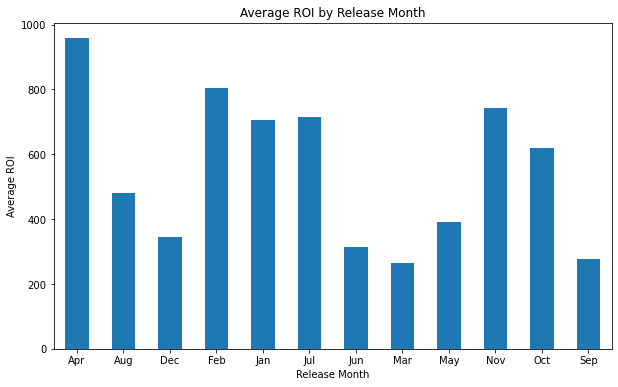

In [83]:
import matplotlib.pyplot as plt
ROI_by_month = df.groupby('release_month')['ROI'].mean()
ROI_by_month.plot(kind='bar', figsize=(10,6))

plt.title('Average ROI by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average ROI')
plt.xticks(rotation=0)
plt.show

In [102]:
df_exploded = df.assign(genres=df['genres'].str.split(',')).explode('genres')
ROI_by_genre = df_exploded.groupby('genres')['ROI'].mean().sort_values(ascending=False)
df_exploded

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,genres,release_month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,nan,Dec
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,nan,May
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-157475300,-44.992943,nan,Jun
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831,463.224389,nan,May
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2426949682,808.983227,nan,Apr
...,...,...,...,...,...,...,...,...,...,...
3810,68,2001-07-06,Cure,10000,94596,94596,179192,1791.920000,nan,Jul
3811,70,1996-04-01,Bang,10000,527,527,-8946,-89.460000,nan,Apr
3812,73,2012-01-13,Newlyweds,9000,4584,4584,168,1.866667,nan,Jan
3813,78,2018-12-31,Red 11,7000,0,0,-7000,-100.000000,nan,Dec


<function matplotlib.pyplot.show(close=None, block=None)>

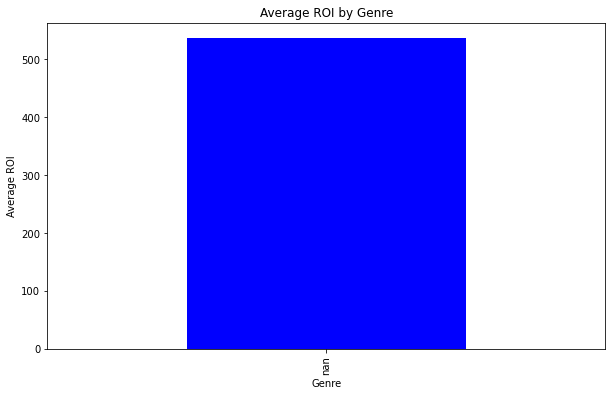

In [101]:
plt.figure(figsize=(10, 6))
ROI_by_genre.plot(kind='bar', color='blue')
plt.title('Average ROI by Genre')
plt.xlabel('Genre')
plt.ylabel('Average ROI')
plt.show

# Conclusions

## Limitations

## Recommendations

## Next Steps